In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.figure(figsize = (8,4))
#import tensorflow as tf
import plotly.express as px

<Figure size 800x400 with 0 Axes>

In [3]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## data split

In [6]:
px.pie(data , names='stroke' , title = 'stroke distribution' , width=500 , height=300) 

almost 5 % of samples has brain stroke , so our data is imbalanced <br>
so we split with stratified strategy

            df_train >  df
    data >              target
            df_test  >  X_test
                        y_test


In [7]:
# main data splits stratifedly to df_train , df_test 
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(data.drop('id' , axis = 1 ) , test_size=0.2 , stratify=data['stroke'] ,random_state=42)
df_train.shape , df_test.shape

((4088, 11), (1022, 11))

In [8]:
df = df_train.drop('stroke' , axis = 1)     # X_train
target = df_train['stroke']                 # y_train

X_test = df_test.drop('stroke', axis = 1)
y_test = df_test['stroke']

In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

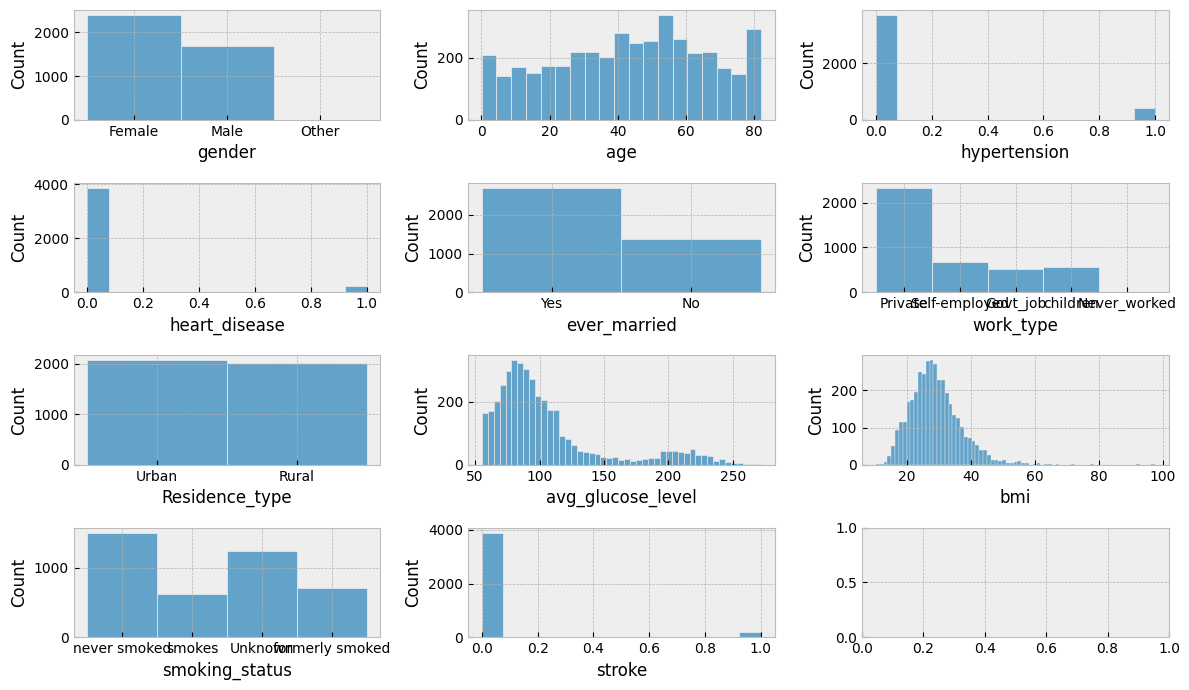

In [11]:
n_row , n_col = 4 , 3 
fig ,ax = plt.subplots(nrows=n_row , ncols=n_col , figsize = (12,7) )
for ax , col in zip(ax.flat , df_train.columns):
    sns.histplot(df_train , ax = ax , x = col)
    plt.tight_layout()

right tail on average glocuse level, <br>
smaller right tail on bmi

In [14]:
# custom info training datest

df_info = pd.concat(objs=[df_train.nunique() , df_train.isna().sum() , df_train.dtypes] , axis = 1 )
df_info.columns = ['nunique' , 'missing' , 'dtype']
df_info

,nunique,missing,dtype
gender,3,0,object
age,103,0,float64
hypertension,2,0,int64
heart_disease,2,0,int64
ever_married,2,0,object
work_type,5,0,object
Residence_type,2,0,object
avg_glucose_level,3339,0,float64
bmi,400,170,float64
smoking_status,4,0,object


### correlation

(Text(0.5, 1.0, 'train data correlation'), None)

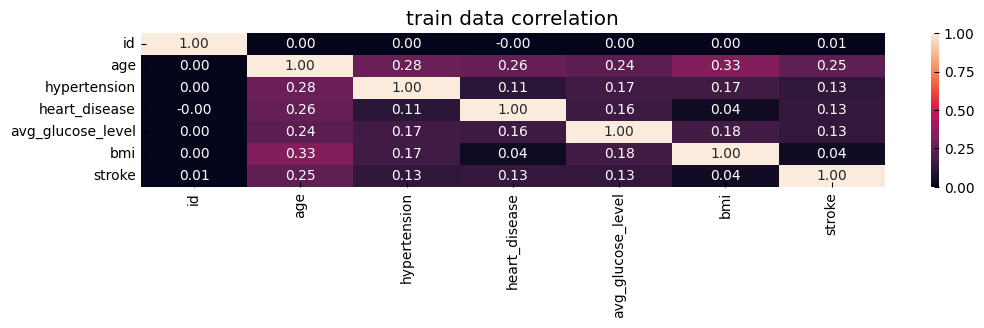

In [19]:
df_corr = df_train.select_dtypes(include=np.number).corr()
df_corr
plt.figure(figsize = (12,2))
sns.heatmap(corr_mat ,annot = True , fmt = '0.2f') ,
plt.title('train data correlation') , plt.grid()

In [ ]:
# stroke corrrelation
df_corr['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.243404
hypertension         0.133109
heart_disease        0.126883
avg_glucose_level    0.125328
bmi                  0.043810
Name: stroke, dtype: float64

### missing value handling 

In [24]:
df_corr['bmi'].sort_values(ascending = False)

bmi                  1.000000
age                  0.335785
avg_glucose_level    0.171683
hypertension         0.167559
stroke               0.043810
heart_disease        0.040068
Name: bmi, dtype: float64

In [40]:
df_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,3918.000000,4088.000000
mean,43.353288,0.097114,0.054061,106.317167,28.922180,0.048679
std,22.596816,0.296148,0.226165,45.259652,7.928378,0.215223
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,77.312500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.945000,28.000000,0.000000
75%,61.000000,0.000000,0.000000,114.197500,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


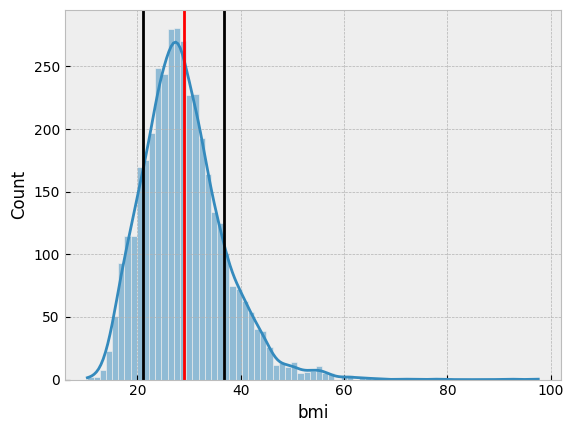

In [48]:
mean_bmi = np.mean(df['bmi'])
std_bmi = np.std(df['bmi'])
sns.histplot(df , x = 'bmi' ,kde = True)
plt.axvline( mean_bmi , color = 'red')
plt.axvline( mean_bmi + std_bmi , color = 'black')
plt.axvline( mean_bmi - std_bmi, color = 'black')

In [ ]:
sns.
